In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = 'data/'

df = pd.read_csv(f'{data_dir}/jobs_step_1_final.csv')

df = df.drop(columns=['steps-step-job_id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6957 entries, 0 to 6956
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   allocation_nodes                     6957 non-null   float64
 1   constraints                          6957 non-null   object 
 2   flags                                6957 non-null   object 
 3   group                                6957 non-null   object 
 4   nodes                                6957 non-null   object 
 5   partition                            6957 non-null   object 
 6   priority                             6957 non-null   float64
 7   user                                 6957 non-null   object 
 8   required-CPUs                        6957 non-null   float64
 9   required-memory                      6957 non-null   float64
 10  state-reason                         6957 non-null   object 
 11  steps-nodes-list              

In [3]:
pd.read_csv(f'{data_dir}/jobs_flattened_cleaned_1.csv').columns.to_numpy()

C:\Users\232_DETI\AppData\Local\Temp\ipykernel_29560\2406715067.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(f'{data_dir}/jobs_flattened_cleaned_1.csv').columns.to_numpy()


array(['allocation_nodes', 'constraints', 'flags', 'group', 'nodes',
       'partition', 'priority', 'qos', 'reservation', 'user',
       'working_directory', 'required-CPUs', 'required-memory',
       'state-current', 'state-reason', 'time-elapsed', 'time-eligible',
       'time-end', 'time-start', 'time-submission', 'time-suspended',
       'time-system-seconds', 'time-system-microseconds', 'time-limit',
       'time-total-seconds', 'time-total-microseconds',
       'time-user-seconds', 'time-user-microseconds', 'wckey-wckey',
       'wckey-flags', 'steps-nodes-list', 'steps-nodes-count',
       'steps-nodes-range', 'steps-time-elapsed', 'steps-time-end',
       'steps-time-start', 'steps-time-suspended',
       'steps-time-system-seconds', 'steps-time-system-microseconds',
       'steps-time-total-seconds', 'steps-time-total-microseconds',
       'steps-time-user-seconds', 'steps-time-user-microseconds',
       'steps-exit_code-status', 'steps-exit_code-return_code',
       'steps-t

In [4]:
print(df.columns.tolist())

['allocation_nodes', 'constraints', 'flags', 'group', 'nodes', 'partition', 'priority', 'user', 'required-CPUs', 'required-memory', 'state-reason', 'steps-nodes-list', 'steps-time-elapsed', 'steps-time-end', 'steps-time-start', 'steps-time-system-microseconds', 'steps-time-total-microseconds', 'steps-time-user-microseconds', 'steps-statistics-energy-consumed', 'steps-tres-requested-average-energy', 'steps-tres-requested-total-mem', 'steps-tres-requested-total-energy', 'steps-tres-requested-total-vmem', 'steps-tres-consumed-max-energy', 'steps-tres-consumed-min-energy', 'steps-tres-consumed-average-energy', 'steps-tres-consumed-total-energy', 'tres-allocated-cpu', 'tres-allocated-mem', 'tres-allocated-node']


Text(0.5, 1.0, 'Correlation plot (only for features with absolute correlation > 0.1)')

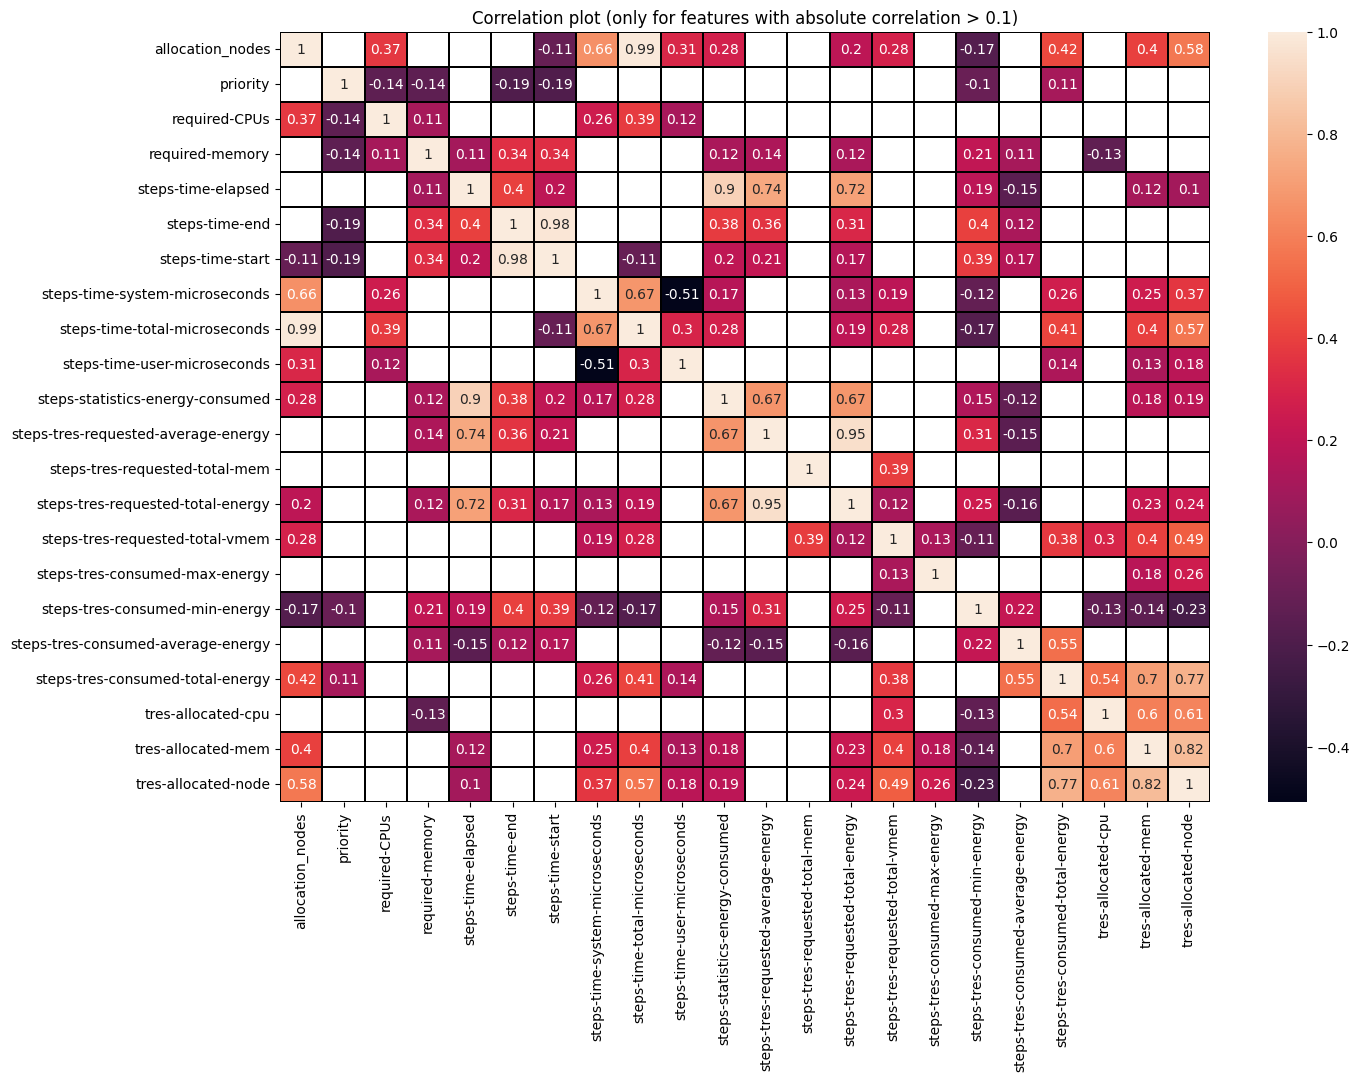

In [5]:
plt.figure(figsize=(15,10))

threshold = 0.1
corr = df.select_dtypes(exclude=['object']).corr(method='pearson').round(5)

sns.heatmap(corr[corr.abs() > threshold], annot=True, linewidths=0.1, linecolor='black')
plt.title(f'Correlation plot (only for features with absolute correlation > {threshold})')

In [6]:
(df['steps-tres-consumed-min-energy'] == df['steps-tres-consumed-max-energy']).value_counts()

True     6809
False     148
dtype: int64

Text(0.5, 1.0, 'Correlation: 0.082')

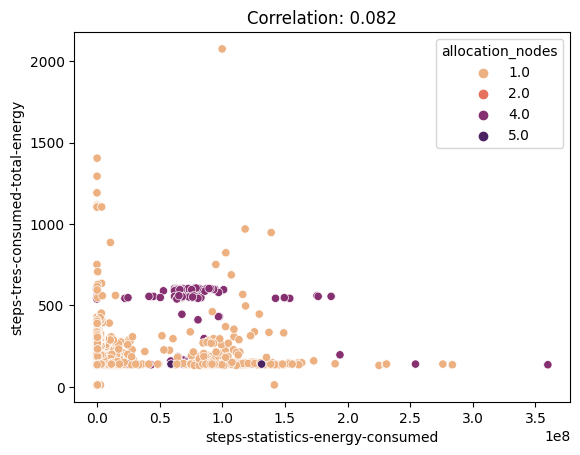

In [7]:
x = 'steps-statistics-energy-consumed'
y = 'steps-tres-consumed-total-energy'
hue =  df['allocation_nodes']
correlation_xy = np.corrcoef(df[x], df[y])[0,1]

sns.scatterplot(data=df, 
                x=x, 
                y=y, 
                hue=hue, 
                palette='flare'
                )

plt.title(f'Correlation: {correlation_xy:.3f}')

<AxesSubplot: xlabel='steps-time-start', ylabel='steps-tres-consumed-total-energy'>

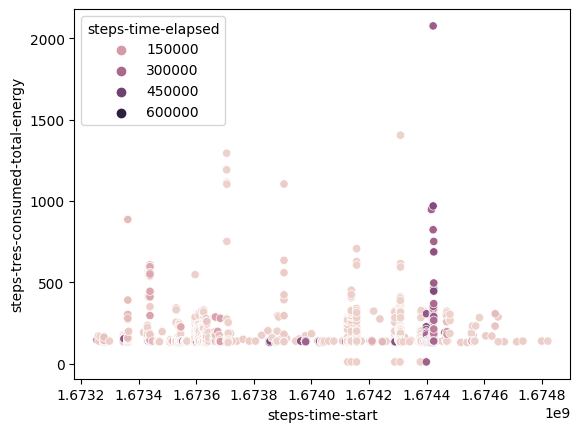

In [8]:
sns.scatterplot(data=df, x='steps-time-start', y='steps-tres-consumed-total-energy', hue='steps-time-elapsed')

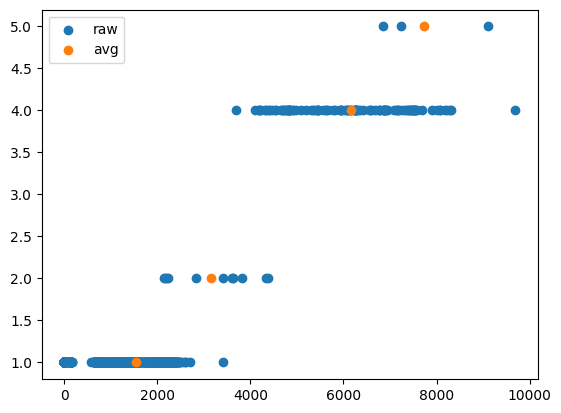

In [9]:

plt.scatter(df['steps-time-system-microseconds'], df['allocation_nodes'], label='raw')

avgs = df[['allocation_nodes', 'steps-time-system-microseconds']].groupby('allocation_nodes').mean()
plt.scatter( avgs['steps-time-system-microseconds'], avgs.index, label='avg')

plt.legend()

In [10]:
# fig, ax = plt.subplots(2, 3, figsize=(10, 8))
# y1 = 'steps-statistics-energy-consumed'
# y2 = 'steps-tres-consumed-average-energy'
# x1 = 'steps-time-elapsed'
# x2 = 'required-memory'
# x3 = 'required-CPUs'
# hue = 'allocation_nodes'
# #hue = 'tres-allocated-node'
# sns.scatterplot(data=df, x=x1, y=y1, hue=hue, ax=ax[0][0])
# sns.scatterplot(data=df, x=x2, y=y1, hue=hue, ax=ax[0][1])
# sns.scatterplot(data=df, x=x3, y=y1, hue=hue, ax=ax[0][2])
# sns.scatterplot(data=df, x=x1, y=y2, hue=hue, ax=ax[1][0])
# sns.scatterplot(data=df, x=x2, y=y2, hue=hue, ax=ax[1][1])
# sns.scatterplot(data=df, x=x3, y=y2, hue=hue, ax=ax[1][2])
# plt.tight_layout()

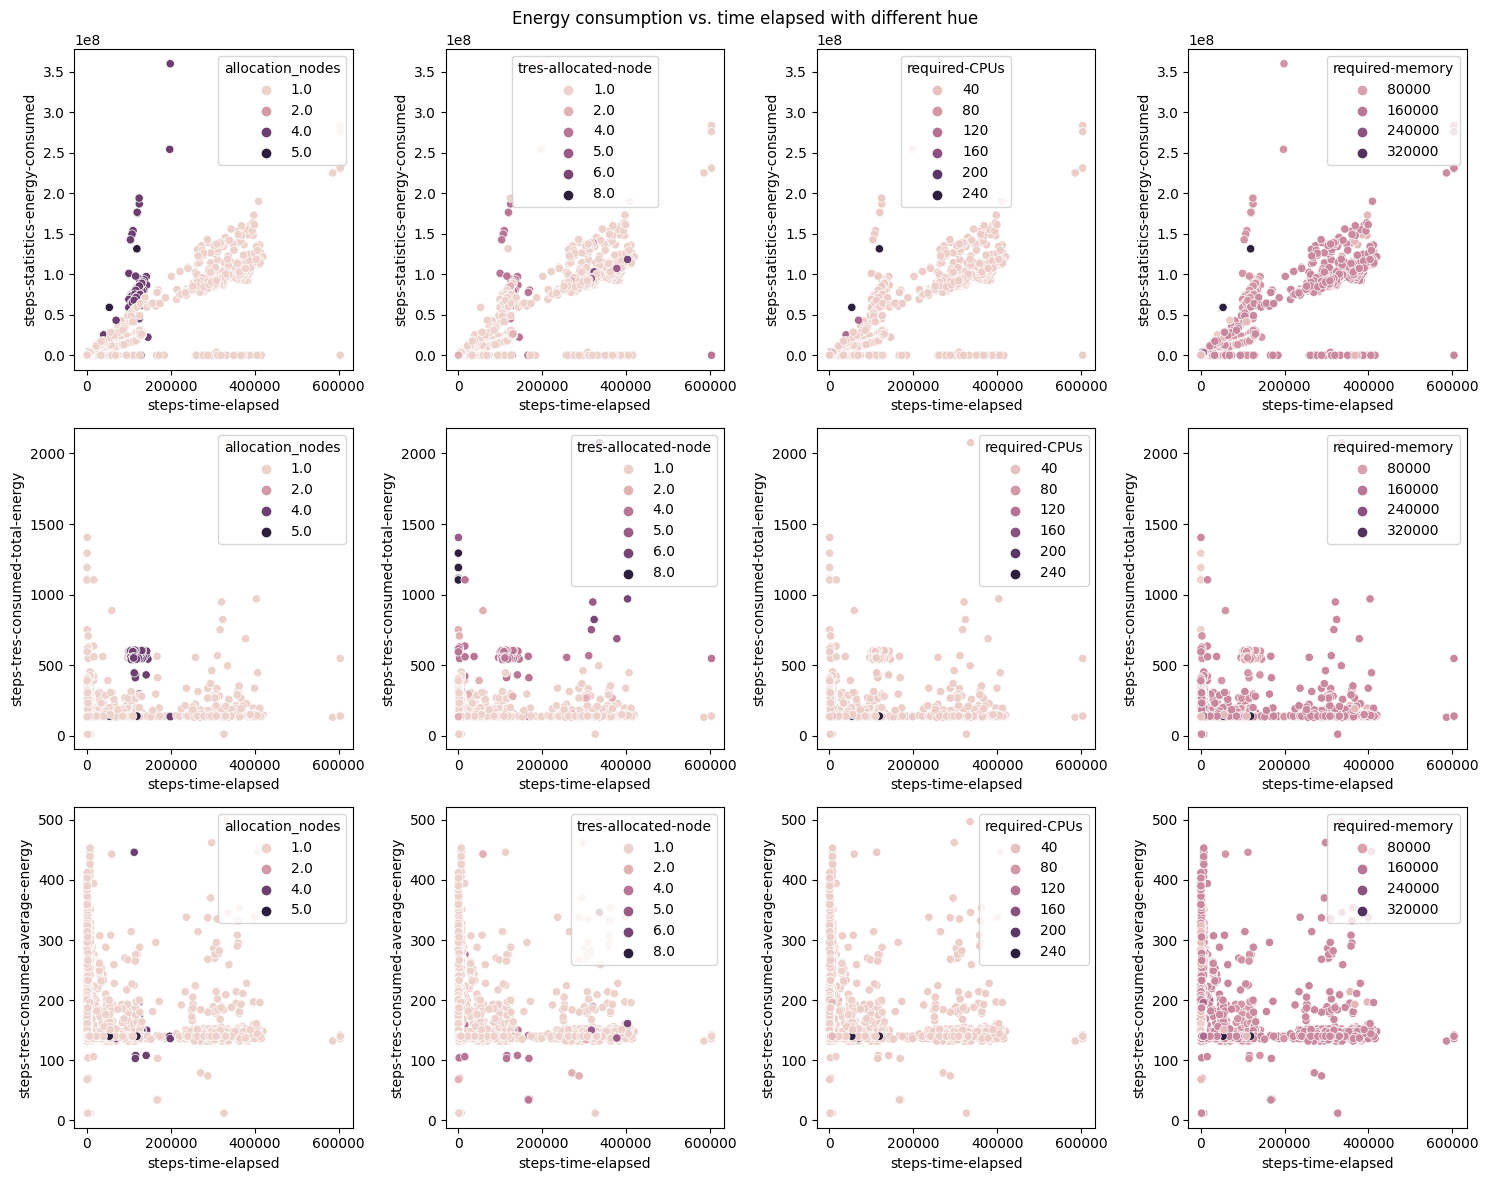

In [11]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
y1 = 'steps-statistics-energy-consumed'
y2 = 'steps-tres-consumed-total-energy'
y3 = 'steps-tres-consumed-average-energy'
x1 = 'steps-time-elapsed'
hue1 = 'allocation_nodes'
hue2 = 'tres-allocated-node'
hue3 = 'required-CPUs'
hue4 = 'required-memory'
#hue = 'tres-allocated-node'

plt.suptitle('Energy consumption vs. time elapsed with different hue')
sns.scatterplot(data=df, x=x1, y=y1, hue=hue1, ax=ax[0][0])
sns.scatterplot(data=df, x=x1, y=y1, hue=hue2, ax=ax[0][1])
sns.scatterplot(data=df, x=x1, y=y1, hue=hue3, ax=ax[0][2])
sns.scatterplot(data=df, x=x1, y=y1, hue=hue4, ax=ax[0][3])
sns.scatterplot(data=df, x=x1, y=y2, hue=hue1, ax=ax[1][0])
sns.scatterplot(data=df, x=x1, y=y2, hue=hue2, ax=ax[1][1])
sns.scatterplot(data=df, x=x1, y=y2, hue=hue3, ax=ax[1][2])
sns.scatterplot(data=df, x=x1, y=y2, hue=hue4, ax=ax[1][3])
sns.scatterplot(data=df, x=x1, y=y3, hue=hue1, ax=ax[2][0])
sns.scatterplot(data=df, x=x1, y=y3, hue=hue2, ax=ax[2][1])
sns.scatterplot(data=df, x=x1, y=y3, hue=hue3, ax=ax[2][2])
sns.scatterplot(data=df, x=x1, y=y3, hue=hue4, ax=ax[2][3])
plt.tight_layout()

In [12]:
columns_of_interest = [
    'allocation_nodes', 
    'tres-allocated-node', 
    'steps-tres-consumed-total-energy', 
    'steps-statistics-energy-consumed', 
    'steps-time-elapsed',
    'required-memory',
    'required-CPUs',
    'steps-time-start',
    'priority',
    # tres
    'tres-allocated-cpu',
    'tres-allocated-mem',
    ]

df.loc[df['steps-tres-consumed-total-energy'] > 1000][columns_of_interest]

,allocation_nodes,tres-allocated-node,steps-tres-consumed-total-energy,steps-statistics-energy-consumed,steps-time-elapsed,required-memory,required-CPUs,steps-time-start,priority,tres-allocated-cpu,tres-allocated-mem
3826,1.0,8.0,1118.0,0.0,347.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3827,1.0,8.0,1114.0,68838.0,322.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3828,1.0,8.0,1108.0,73398.0,353.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3829,1.0,8.0,1294.0,73088.0,356.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3830,1.0,8.0,1194.0,0.0,340.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3831,1.0,8.0,1192.0,0.0,379.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3834,1.0,8.0,1104.0,69762.0,327.0,1000.0,24.0,1.673706e+09,8153.0,384.0,786432.0
3864,1.0,4.0,1105.0,3791424.0,16327.0,122880.0,24.0,1.673905e+09,8230.0,128.0,1048576.0
5825,1.0,5.0,1405.0,128048.0,595.0,122880.0,28.0,1.674309e+09,6.0,240.0,1894400.0
6857,1.0,6.0,2076.0,99922406.0,336698.0,122880.0,28.0,1.674423e+09,3.0,144.0,749568.0


In [13]:
df.loc[df['steps-tres-consumed-total-energy'] < 100][columns_of_interest]

,allocation_nodes,tres-allocated-node,steps-tres-consumed-total-energy,steps-statistics-energy-consumed,steps-time-elapsed,required-memory,required-CPUs,steps-time-start,priority,tres-allocated-cpu,tres-allocated-mem
4054,1.0,1.0,12.0,2568208.0,7642.0,122880.0,28.0,1.674126e+09,9.0,28.0,122880.0
4158,1.0,1.0,12.0,2793088.0,6991.0,122880.0,28.0,1.674138e+09,9.0,28.0,122880.0
4417,1.0,1.0,12.0,777560.0,2776.0,102400.0,28.0,1.674156e+09,17.0,28.0,102400.0
4923,1.0,1.0,12.0,0.0,2758.0,122880.0,28.0,1.674289e+09,17.0,28.0,122880.0
5401,1.0,1.0,12.0,477648.0,2935.0,122880.0,28.0,1.674290e+09,17.0,28.0,122880.0
5640,1.0,1.0,12.0,0.0,1490.0,122880.0,28.0,1.674308e+09,6.0,28.0,122880.0
5907,1.0,1.0,12.0,422456.0,1882.0,122880.0,28.0,1.674378e+09,17.0,28.0,122880.0
6431,1.0,1.0,12.0,141569328.0,326700.0,122880.0,28.0,1.674399e+09,3.0,28.0,122880.0


count     6957.000000
mean        98.911600
std       2350.133347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      86016.000000
Name: steps-tres-requested-total-mem, dtype: float64


<AxesSubplot: >

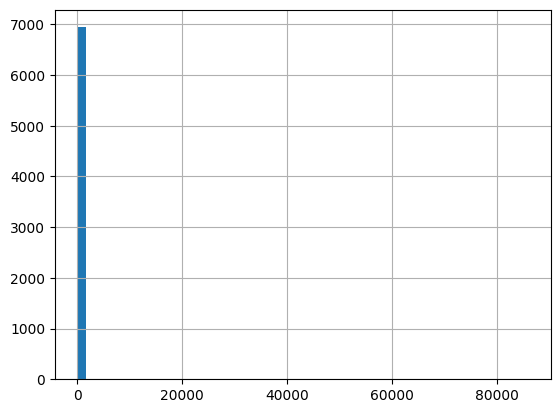

In [14]:
a = 'steps-tres-requested-total-mem'
print(df[a].describe())
df[a].hist(bins=50)

In [15]:
# total micro seconds
df['steps-time-total-microseconds'].describe()

count     6957.000000
mean      2211.936611
std        814.724788
min       1256.000000
25%       2071.000000
50%       2114.000000
75%       2152.000000
max      10859.000000
Name: steps-time-total-microseconds, dtype: float64

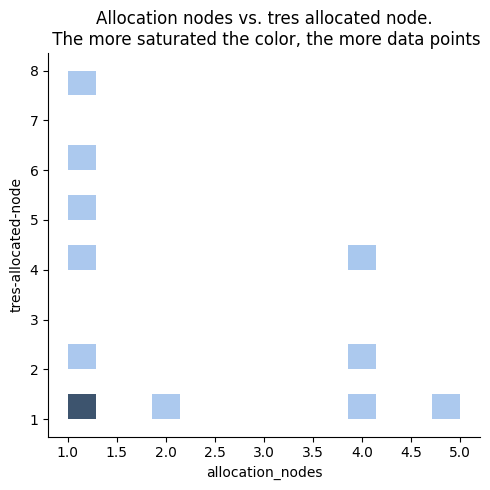

In [16]:
# Scatterplot of allocation nodes vs tres allocated node
sns.displot(data=df, x='allocation_nodes', y='tres-allocated-node', legend=True)
plt.title('Allocation nodes vs. tres allocated node.\n The more saturated the color, the more data points')
plt.tight_layout()
plt.savefig('images/step1/allocation_nodes_vs_tres_allocated_node.png')


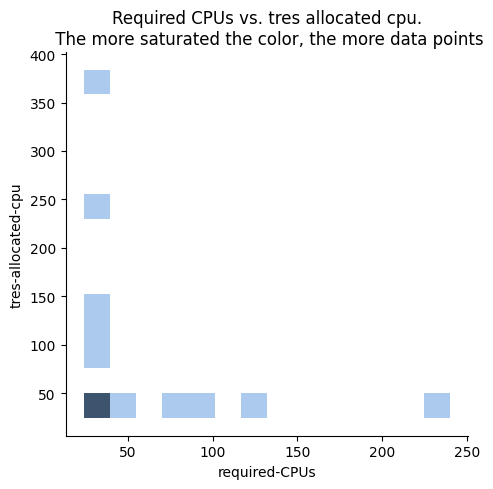

In [17]:
# Scatterplot of required-CPUs vs tres allocated cpu
sns.displot(data=df, x='required-CPUs', y='tres-allocated-cpu', legend=True)
plt.title('Required CPUs vs. tres allocated cpu.\n The more saturated the color, the more data points')
plt.tight_layout()
plt.savefig('images/step1/required_CPUs_vs_tres_allocated_cpu.png')

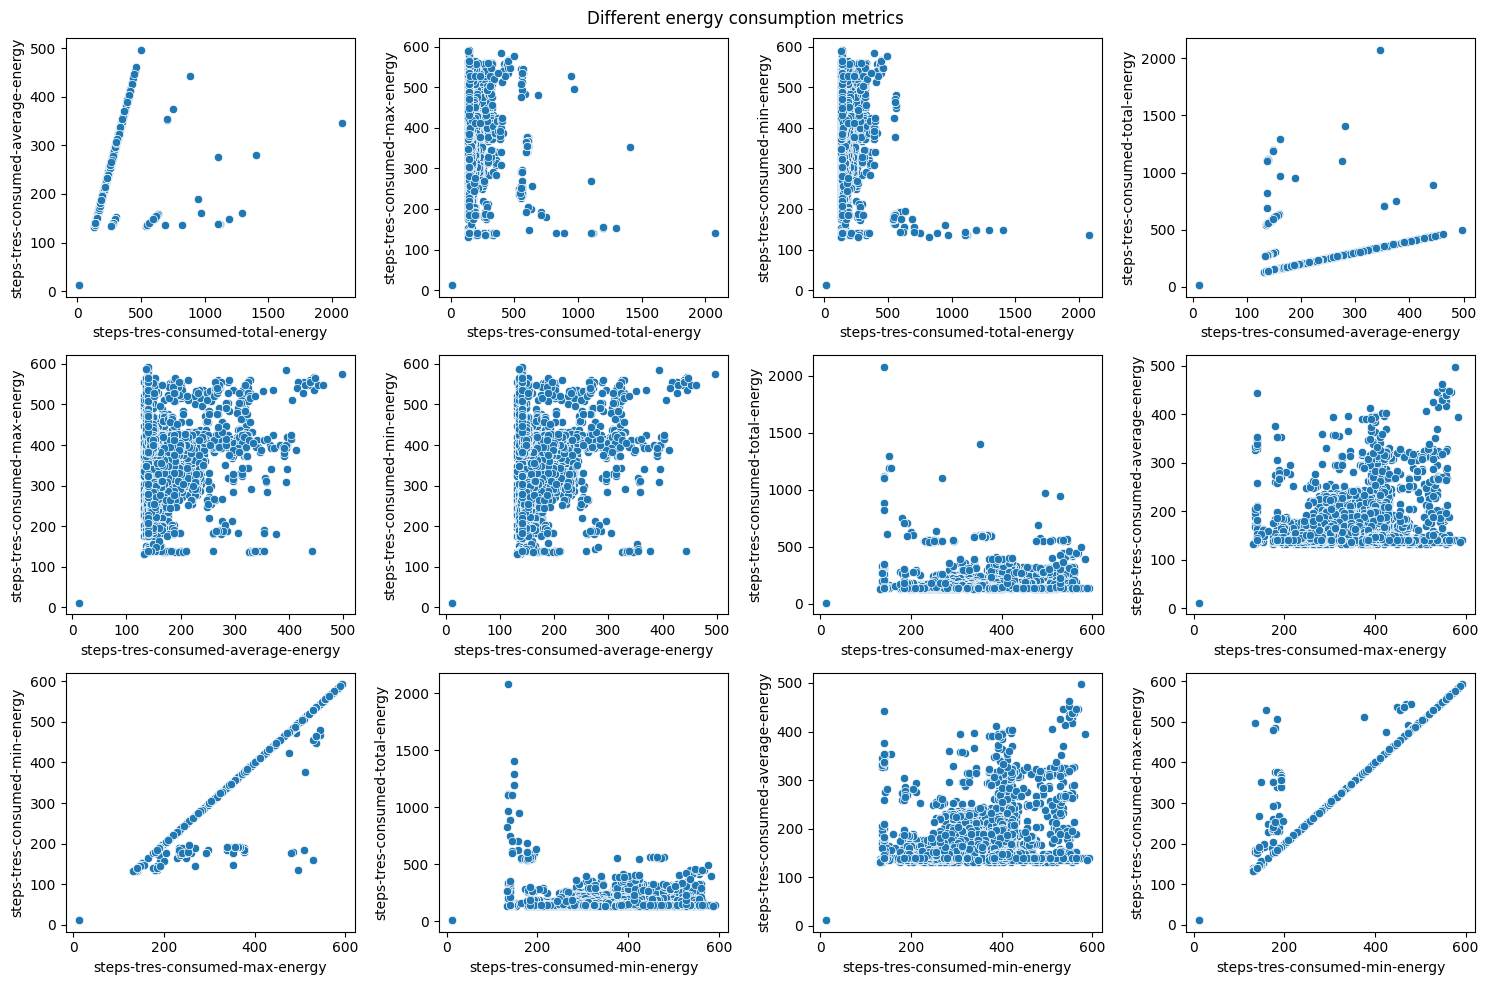

In [47]:
cols = ['steps-tres-consumed-total-energy', 'steps-tres-consumed-average-energy', 'steps-tres-consumed-max-energy', 'steps-tres-consumed-min-energy']

_df = df[df['steps-tres-consumed-max-energy'] < 1000]
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()
x = 0
# print plots of each column vs another as scatter plot
for i, col in enumerate(cols):
    for j, col2 in enumerate(cols):
        if i != j:
            sns.scatterplot(data=_df, x=col, y=col2, ax=ax[x])
            x += 1
plt.suptitle('Different energy consumption metrics')
plt.tight_layout()


In [35]:
low_energy_df = df[df['steps-tres-consumed-total-energy'] < 140]
low_energy_df['steps-tres-consumed-total-energy'].value_counts()

136.0    851
132.0     90
139.0     51
137.0     48
138.0     46
135.0     11
12.0       8
134.0      3
133.0      2
Name: steps-tres-consumed-total-energy, dtype: int64

In [37]:
low_energy_df['nodes'].value_counts()

e2016    5
e1490    5
e1630    5
e1336    5
e1212    5
        ..
e1731    1
e1635    1
e1517    1
e1449    1
e2229    1
Name: nodes, Length: 726, dtype: int64

<AxesSubplot: >

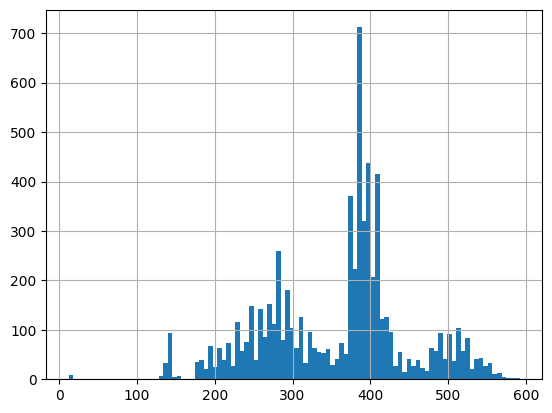

In [45]:
df[df['steps-tres-consumed-max-energy'] < 1000]['steps-tres-consumed-max-energy'].hist(bins=100)

<AxesSubplot: >

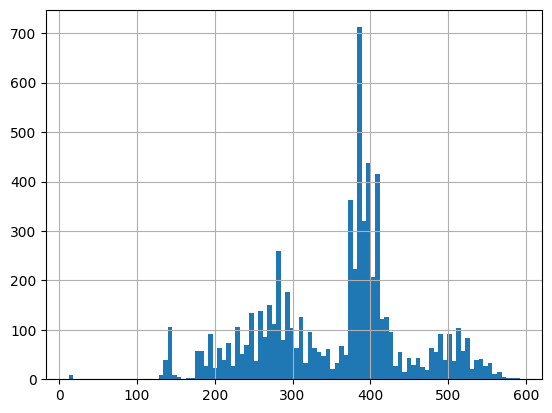

In [46]:
df[df['steps-tres-consumed-min-energy'] < 1000]['steps-tres-consumed-min-energy'].hist(bins=100)